## Practica Semanal Calificada

Ud va a desarrollar un modelo de clasificacion binaria utilizando **regresion logistica** para determinar si un paciente tiene o no un padecimiento cardiaco.

La variable a predecir es la variable "target" la cual tiene valores de 1 y 0. Donde 1 es que el paciente tiene un padecimiento cardiaco.

Los atributos X son los siguientes:

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

El dataset contiene 303 registros de un hospital de Cleveland. Es recomendable que lea el siguiente [paper](https://www.researchgate.net/publication/309210947_Heart_Disease_prediction_using_Machine_learning_and_Data_Mining_Technique/link/5805eb0f08ae03256b75d9a1/download) para que obtenga un mejor conocimiento sobre el trasfondo del problema. 

In [296]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [297]:
data = pd.read_csv("data/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [298]:
# EJERCICIO - Feature Engineering
# En esta seccion incluya transformaciones, scaling, eliminar o crear variables segun considere apropiado.

corr = data.corr()
corr.style.background_gradient(cmap='plasma').set_precision(2)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.28,0.21,0.12,-0.12,-0.40,0.10,0.21,-0.17,0.28,0.07,-0.23
sex,-0.10,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.04,0.14,0.10,-0.03,0.12,0.21,-0.28
cp,-0.07,-0.05,1.00,0.05,-0.08,0.09,0.04,0.30,-0.39,-0.15,0.12,-0.18,-0.16,0.43
trestbps,0.28,-0.06,0.05,1.00,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.14
chol,0.21,-0.20,-0.08,0.12,1.00,0.01,-0.15,-0.01,0.07,0.05,-0.00,0.07,0.10,-0.09
fbs,0.12,0.05,0.09,0.18,0.01,1.00,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03,-0.03
restecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.14
thalach,-0.40,-0.04,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.39,-0.21,-0.10,0.42
exang,0.10,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1.00,0.29,-0.26,0.12,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1.00,-0.58,0.22,0.21,-0.43


In [299]:
# Correlations
np.abs(corr['target']).sort_values(ascending=False)

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64

In [300]:
# Drop variables
df = data.copy()
df.drop(["fbs", "chol"], axis=1, inplace=True)
df.drop(["restecg", "trestbps"], axis=1, inplace=True)
df.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,150,0,2.3,0,0,1,1
1,37,1,2,187,0,3.5,0,0,2,1
2,41,0,1,172,0,1.4,2,0,2,1
3,56,1,1,178,0,0.8,2,0,2,1
4,57,0,0,163,1,0.6,2,0,2,1


In [305]:
# Use one hot encoding
from sklearn.preprocessing import OrdinalEncoder

df_onehot = df.copy()

def onehot_encode(df, feature):
    enc = OrdinalEncoder()
    cp_dummies = pd.get_dummies(df[feature], prefix=feature)
    new_df = df.drop([feature], axis=1)
    return new_df.join(cp_dummies)

df_onehot = onehot_encode(df_onehot, 'cp')
df_onehot = onehot_encode(df_onehot, 'exang')
df_onehot = onehot_encode(df_onehot, 'slope')
df_onehot = onehot_encode(df_onehot, 'thal')
df_onehot = onehot_encode(df_onehot, 'sex')

df_onehot.head()


,age,thalach,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,sex_0,sex_1
0,63,150,2.3,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1
1,37,187,3.5,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1
2,41,172,1.4,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
3,56,178,0.8,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
4,57,163,0.6,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0


In [306]:
# scaling
from sklearn.preprocessing import MinMaxScaler

def sclaleFeature(feature_values):
    result = feature_values.values.reshape(-1,1)
    return MinMaxScaler().fit(result).transform(result)

df_scaled = df_onehot.copy()

df_scaled['age'] = sclaleFeature(df_scaled['age'])
df_scaled['thalach'] = sclaleFeature(df_scaled['thalach'])
df_scaled['oldpeak'] = sclaleFeature(df_scaled['oldpeak'])
df_scaled['ca'] = sclaleFeature(df_scaled['ca'])


df_scaled.head()


,age,thalach,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,sex_0,sex_1
0,0.708333,0.603053,0.370968,0.0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1
1,0.166667,0.885496,0.564516,0.0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1
2,0.250000,0.770992,0.225806,0.0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
3,0.562500,0.816794,0.129032,0.0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
4,0.583333,0.702290,0.096774,0.0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0


In [307]:
# Dataset Split & scaling
from sklearn.model_selection import train_test_split
# from sklearn import preprocessing

y = df_scaled['target']
X = df_scaled.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=82)

In [308]:
# EJERCICIO - Entrenar Modelo & Resampling
# Utilize SKlearn para entrenar el modelo de logistic regression. 
# Como ud solo tiene este dataset, recuerde utilizar la mejor tecnica de resampling. (ver notebook #2)

model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [309]:
# MSE
y_prima = model.predict(X_train)
mse = mean_squared_error(y_train, y_prima)
print('MSE: %.3f' % mse)

# Precision
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)

print("Exactitud (Train):", acc_train)
print("Exactitud (Test):", acc_test)

MSE: 0.136
Exactitud (Train): 0.8636363636363636
Exactitud (Test): 0.7704918032786885


In [310]:
# Cross Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=10)

print("Exactitud c/u:", scores)
print('Exactitud Promedio %.3f' % scores.mean())

Exactitud c/u: [0.81 0.84 0.87 0.9  0.83 0.87 0.87 0.87 0.7  0.83]
Exactitud Promedio 0.838


In [311]:
# AIC & BIC
from math import log

k = len(model.coef_) + 1
n = X.shape[0]

def estimar_aic():
    aic = n * log(mse) + 2 * k
    return aic

def estimar_bic():
    bic = n * log(mse) + k * log(n)
    return bic


aic_score = estimar_aic()
bic_score = estimar_bic()

print('AIC: %.3f' % aic_score, 'MSE: %.3f' % mse, "Parametros:",k)
print('BIC: %.3f' % bic_score, 'MSE: %.3f' % mse, "Parametros:",k)

AIC: -599.706 MSE: 0.136 Parametros: 2
BIC: -592.279 MSE: 0.136 Parametros: 2


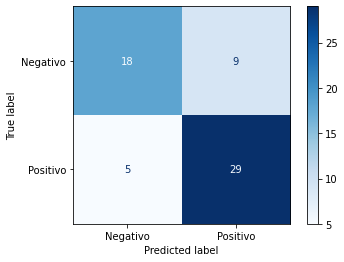

[[18  9]
 [ 5 29]]


In [312]:
# EJERCICIO - Metricas y Evaluacion
# Implemente la matrix de confusion y calcule todas las metricas del notebook #4 utilizando classification_report 
# y accuracy_score. Considere el resultado obtenido e itere sobre todo el notebook hasta sentirse satisfecho con
# los resultados. 
# ** ES VALIDO HACER BENCHMARK CON SUS COMPANEROS DE CLASE ** pueden postear sus metricas en el Grupo de WA para
# comparar resultados.
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

class_names = ['Negativo','Positivo']

np.set_printoptions(precision=2)

disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize=None)

plt.show()
print(disp.confusion_matrix)


In [295]:
from sklearn.metrics import classification_report

y_prima_2 = model.predict(X_test)
print(classification_report(y_test, y_prima_2, target_names=class_names))



              precision    recall  f1-score   support

    Negativo       0.78      0.67      0.72        27
    Positivo       0.76      0.85      0.81        34

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61



In [313]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_prima_2)

0.7704918032786885

In [157]:
# Bienvenidos al mundo de machine learning!